<a href="https://colab.research.google.com/github/FauzanNR/DataAnalysisDicoding/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E-Comerce Public Data Analysis

- **Nama:** Fauzan Nur Rifai
- **Email:** fauzannur.rifai.fnr@gmail.com
- **ID Dicoding:** fauzannurrifai

#Business Questions
- Wich region gave the most revenue?
- Are there specific times in all regions when customers make the most purchase ?
- What are the most purchased products?
- Which seller make the most selling?



#Importing Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.width', None)       # Avoid truncation

#Data Wrangling

##Data Gathering

In [2]:
customers_df = pd.read_csv("Data/E-Commerce-Public-Dataset/customers_dataset.csv")
orders_df = pd.read_csv("Data/E-Commerce-Public-Dataset/orders_dataset.csv")
geolocation_df = pd.read_csv("Data/E-Commerce-Public-Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("Data/E-Commerce-Public-Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("Data/E-Commerce-Public-Dataset/order_payments_dataset.csv")
sellers_df = pd.read_csv("Data/E-Commerce-Public-Dataset/sellers_dataset.csv")
products_df = pd.read_csv("Data/E-Commerce-Public-Dataset/products_dataset.csv")
products_translation_df = pd.read_csv("Data/E-Commerce-Public-Dataset/product_category_name_translation.csv")

In [3]:
customers_df.name = "Customers"
orders_df.name = "Orders"
geolocation_df.name = "Geolocations"
order_items_df.name = "Order Items"
order_payments_df.name = "Order Payments"
sellers_df.name = "Sellers"
products_df.name = "Products"
products_translation_df.name = "Translated Product"
df_list = [ customers_df, orders_df, geolocation_df, order_items_df, order_payments_df, sellers_df, products_df, products_translation_df]

In [4]:
for data in df_list:
    print(f"###Data {data.name} Info###")
    data.info()

###Data Customers Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
###Data Orders Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_p

##Data Assesment

In [5]:
for data in df_list:
    print(f"###{data.name}###")
    print("---Missing Data---")
    print(data.isna().sum())

    print("---Duplicated Data---")
    print(data.duplicated().sum())

    print("---Data Desc---")
    print(data.describe())

###Customers###
---Missing Data---
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
---Duplicated Data---
0
---Data Desc---
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
###Orders###
---Missing Data---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
---Duplicated Data---
0
---Data Desc---
                                order_id                       customer_id  \
count  

##Data Cleaning

In [6]:
#Duplicated Data

for data in df_list:
    print(f"###{data.name}###")
    print(data.duplicated().sum())
    data.drop_duplicates(inplace=True)
    print(data.duplicated().sum())

###Customers###
0
0
###Orders###
0
0
###Geolocations###
261831
0
###Order Items###
0
0
###Order Payments###
0
0
###Sellers###
0
0
###Products###
0
0
###Translated Product###
0
0


In [7]:
#Order missing value
# order_approved_at                 160
# order_delivered_carrier_date     1783
# order_delivered_customer_date    2965
orders_df.order_status.value_counts()


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
#checking approved and delivered order but missing value
def order_approvement_missing():
    order_approved_null_status = orders_df[orders_df["order_approved_at"].isna() & orders_df["order_status"]]
    return order_approved_null_status.order_status.value_counts()

order_approvement_missing()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [9]:
#Convert to datetime
datetime_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_column:
    orders_df[column] = pd.to_datetime(orders_df[column], errors="coerce")

In [10]:
#get average approvement time
approved_notna = (orders_df["order_approved_at"].notna() &  orders_df["order_purchase_timestamp"].notna()
                  & (orders_df["order_status"] == "delivered")
                  )
order_approvement_delay = (orders_df.loc[approved_notna, "order_approved_at"] - orders_df.loc[approved_notna, "order_purchase_timestamp"])
avg_approvement = order_approvement_delay.mean()
print(avg_approvement)

0 days 10:16:36.361243572


In [11]:
orders_df.loc[order_approvement_delay.idxmax()]

order_id                         0a93b40850d3f4becf2f276666e01340
customer_id                      a70076d8d4bfce15f8081951c43bf187
order_status                                            delivered
order_purchase_timestamp                      2018-01-20 14:24:50
order_approved_at                             2018-02-20 11:51:27
order_delivered_carrier_date                  2018-02-21 19:34:13
order_delivered_customer_date                 2018-03-02 22:37:49
order_estimated_delivery_date                 2018-02-23 00:00:00
Name: 96251, dtype: object

In [12]:
delivered_missing_approvement = (((orders_df["order_status"] == "delivered") | (orders_df["order_status"] == "canceled") ) & (orders_df["order_approved_at"].isna()) & (orders_df["order_purchase_timestamp"]+avg_approvement < orders_df["order_delivered_carrier_date"]))

orders_df.loc[delivered_missing_approvement]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [13]:
orders_df.loc[delivered_missing_approvement, "order_approved_at"] = (orders_df.loc[delivered_missing_approvement, "order_purchase_timestamp"]+avg_approvement).dt.floor("S")

In [14]:
orders_df.loc[delivered_missing_approvement]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-19 00:56:36,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 23:02:07,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 23:46:23,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-19 03:05:11,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 23:22:31,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 23:04:44,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 11:45:23,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 21:20:55,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-20 08:43:35,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-18 03:38:31,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [15]:
order_approvement_missing()

canceled    141
created       5
Name: order_status, dtype: int64

Delivered but missing order_delivered_carrier_date and order_delivered_customer_date

In [16]:
delivered_missing_carrier_customer = (orders_df["order_delivered_carrier_date"].isna() 
                                      & orders_df["order_delivered_customer_date"].isna() 
                                      & (orders_df["order_status"] == "delivered"))

orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [17]:
#avg order_delivered_carrier_date

delivered_notna =orders_df[orders_df["order_delivered_carrier_date"].notna() & orders_df["order_delivered_customer_date"].notna()
                   & (orders_df["order_status"] == "delivered")]

order_delivered_carrier_date_delay = (delivered_notna["order_delivered_carrier_date"] - delivered_notna["order_approved_at"])

avg_order_delivered_carrier_date =order_delivered_carrier_date_delay.mean()
avg_order_delivered_carrier_date

Timedelta('2 days 19:10:56.833666773')

Assignin delivered order with missing approvement data

In [18]:
orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"] = (orders_df.loc[delivered_missing_carrier_customer, "order_approved_at"]+avg_order_delivered_carrier_date).dt.floor("S")

In [19]:
orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-28 18:41:12,NaT,2017-06-23


In [20]:
carrier_to_estimated = (orders_df.loc[delivered_missing_carrier_customer, "order_estimated_delivery_date"] - orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"] )
median_date = carrier_to_estimated/2
median_date

92643   12 days 14:39:24
dtype: timedelta64[ns]

In [21]:
orders_df.loc[delivered_missing_carrier_customer, "order_delivered_customer_date"] = (orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"]+median_date).dt.floor("S")

In [22]:
orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-28 18:41:12,2017-06-10 09:20:36,2017-06-23


another more

notna_but_delivered

In [23]:
notna_but_delivered =((orders_df["order_status"] == "delivered"))

orders_df.loc[notna_but_delivered].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    7
order_estimated_delivery_date    0
dtype: int64

Delivered orders with missing order_delivered_customer_date

In [24]:
isna_order_delivered_customer_date =((orders_df["order_status"] == "delivered") 
                  & orders_df["order_delivered_customer_date"].isna())

orders_df.loc[isna_order_delivered_customer_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [25]:
orders_df.loc[isna_order_delivered_customer_date, "order_delivered_customer_date"] = (orders_df.loc[isna_order_delivered_customer_date, "order_delivered_carrier_date"]
                                                                                                     +((orders_df.loc[isna_order_delivered_customer_date, "order_estimated_delivery_date"] - orders_df.loc[isna_order_delivered_customer_date, "order_delivered_carrier_date"])/2)
                                                                                                     ).dt.floor("S")


In [26]:
orders_df.loc[isna_order_delivered_customer_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-09 09:06:11,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-05 16:02:30,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-16 18:58:30,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-16 18:58:30,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-13 16:44:00,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-19 07:05:00,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-11 09:43:00,2018-07-19


Delivered orders with missing order_delivered_carrier_date

In [27]:
isna_order_delivered_carrier_date =((orders_df["order_status"] == "delivered") 
                  & orders_df["order_delivered_carrier_date"].isna()
)

orders_df.loc[isna_order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14


In [28]:
orders_df.loc[isna_order_delivered_carrier_date, "order_delivered_carrier_date"] = (
    orders_df.loc[isna_order_delivered_carrier_date, "order_approved_at"]+avg_order_delivered_carrier_date
).dt.floor("S")

In [29]:
orders_df.loc[isna_order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-10-02 04:18:12,2017-11-20 19:44:47,2017-11-14


In [30]:
notna_but_delivered =((orders_df["order_status"] == "delivered"))

orders_df.loc[notna_but_delivered].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [32]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [33]:
for order_stat in orders_df['order_status'].unique():
    print(f"==={order_stat}===")
    orders = orders_df[orders_df['order_status'] == order_stat]
    
    print(f"{orders.isna().sum()}")

===delivered===
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
===invoiced===
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64
===shipped===
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64
===processing===
order_id           

Product missing data

In [34]:
products_df["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [35]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
products_df["product_weight_g"].fillna(products_df["product_weight_g"].median(), inplace=True)
products_df["product_length_cm"].fillna(products_df["product_length_cm"].median(), inplace=True)
products_df["product_height_cm"].fillna(products_df["product_height_cm"].median(), inplace=True)
products_df["product_width_cm"].fillna(products_df["product_width_cm"].median(), inplace=True)


In [37]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [38]:
products_df["product_category_name"].fillna("unknown", inplace=True)

In [39]:
products_df["product_name_lenght"].fillna(products_df["product_name_lenght"].mean(), inplace=True)

In [109]:
products_df["product_description_lenght"].fillna(products_df["product_description_lenght"].mean(), inplace=True)

In [112]:
products_df["product_photos_qty"].fillna(products_df["product_photos_qty"].mean(), inplace=True)

In [113]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Insight:
- Duplication droping through loop which will minimize process time
- Missing data in orders_df was quite complicated but, I concluded that all orders with delivered status must not contain null data. for example shipped, processing, cancled orders does not need order_delivered_customer_date.
- Product with with missing data mark as unknown data though the original data is in portugis languange


#Exploratory Data Analysis

Order and Region

In [206]:
orders_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
67389,eb72ac18675db60b2a155952fb89e3d9,af959a566c69d8a74b81ba90648f6cd8,delivered,2017-11-30 10:48:32,2017-11-30 11:02:38,2017-12-05 23:52:35,2017-12-12 16:58:44,2017-12-21
30837,cfce0ad0c924cecbe5fde10535420084,276efbef4c6f512a21a9cd9ccb4ecb31,unavailable,2017-05-07 20:39:35,2017-05-07 20:55:20,NaT,NaT,2017-06-12
71470,6d6f0c5bbf3fc7bbef3b260c1a8c89f8,e236ca0447927499f71f89d6a453e0b0,delivered,2017-08-30 15:31:33,2017-08-30 15:44:36,2017-08-31 17:25:18,2017-09-01 19:13:03,2017-09-12


In [207]:
order_payments_df.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25486,d17a342bb9f94d40c3b6df4a600b5cee,1,credit_card,1,74.76
51145,9f3c15fb0dfc4d3f2d9f5e8e9323a9e5,1,credit_card,5,105.04
67619,5e9f1a71f53f74f8c4e829ffbb4b52e9,1,credit_card,2,205.95


In [208]:
customers_df.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99196,7714501cf5996832cd4c4b165876f8c5,2dc40a711263d0661f2e1e4fe8983091,3871,sao paulo,SP
62937,5e900fe5368cc480af847d88f6548fe7,18e232174d7b28735519096f394a4e3f,60872,fortaleza,CE
73692,f0536d444683d894060a91bbb434fe2b,a8013fd4e4acf9c0c679bda6d572eeee,75902,rio verde,GO


In [209]:
customer_orders =orders_df.merge(customers_df[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='inner')
customer_orders.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state
7958,489f6e3f33b0c5303c7f0c83f3ea8db5,4f53572a0b69b4bcb158ce76062be4cf,delivered,2018-04-02 14:06:57,2018-04-03 14:09:55,2018-04-05 21:45:49,2018-04-11 21:21:58,2018-04-23,manhuacu,MG
51465,640993b27e5e97a3fd872bf9239b1616,9d218e008f818a8c6743c1d06808d2f1,delivered,2018-03-28 15:21:56,2018-03-28 15:35:15,2018-03-29 19:12:50,2018-04-05 14:58:43,2018-04-19,pinhais,PR
26068,b40f10c37590cd802e26b93d102f7767,b9a29b8b3d3a8e6f24bca58de7c25693,delivered,2018-02-01 18:14:13,2018-02-01 19:01:13,2018-02-09 23:28:55,2018-02-15 22:07:01,2018-03-02,campos do jordao,SP


In [210]:
payment_val_order_region = customer_orders.merge(order_payments_df[['order_id', 'payment_value']], on='order_id', how='inner')
payment_val_order_region.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_value
84508,9770161a61210c2eaee29c5a572785c3,53f662ecb7b15d222231d55affdce605,delivered,2018-03-20 21:44:50,2018-03-20 22:08:52,2018-03-21 19:20:34,2018-03-31 13:44:53,2018-04-06,itu,SP,62.78
66259,15389fc860a5a2db39fd86b758b8e9ba,5374193558b2bf756bd14a31b5659964,delivered,2018-07-20 13:30:02,2018-07-20 14:05:17,2018-07-23 10:18:00,2018-07-27 19:08:33,2018-08-16,santa cruz do sul,RS,43.07
52573,4438006ddb5015b3c15d1d5e6c83c80b,caba2eba9fa3f3a3a838cc2a8307edc3,delivered,2018-02-16 11:46:02,2018-02-18 12:26:49,2018-02-21 18:09:08,2018-03-17 18:03:39,2018-03-12,goiania,GO,67.50


In [172]:
state_revenue = payment_val_order_region.groupby(by='customer_state')['payment_value'].sum().reset_index()
state_revenue = state_revenue.sort_values(by='payment_value', ascending=False)

In [211]:
state_revenue

,customer_state,payment_value
25,SP,5998226.96
18,RJ,2144379.69
10,MG,1872257.26
22,RS,890898.54
17,PR,811156.38
23,SC,623086.43
4,BA,616645.82
6,DF,355141.08
8,GO,350092.31
7,ES,325967.55


Purchase time region order

In [220]:
order_time =payment_val_order_region.sort_values(by='order_purchase_timestamp', ascending=True)
order_time

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_value
4722,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,boa vista,RR,136.23
4577,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,passo fundo,RS,75.06
10525,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,sao jose dos campos,SP,40.95
86765,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,sao paulo,SP,109.34
97434,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,sao paulo,SP,45.46
...,...,...,...,...,...,...,...,...,...,...,...
52697,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,guarulhos,SP,137.03
92424,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,pirai,RJ,80.38
33376,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,registro,SP,197.55
71373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,picos,PI,222.03


Ordered Product

In [236]:
product_order_item_df =order_items_df.merge(products_df[['product_id', 'product_category_name']], on="product_id", how="inner")

In [237]:
ordered_product = product_order_item_df.merge(orders_df, on='order_id', how='inner')
ordered_product.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
111838,f6284b20e702b2576ee9a3531fde571d,1,6edc9b56c4c39bdb01f497fa86554003,7299e27ed73d2ad986de7f7c77d919fa,2018-07-24 09:03:24,89.99,22.56,consoles_games,b9e21fd96c08b1563793c5def420b9a3,delivered,2018-07-20 08:47:09,2018-07-20 09:03:24,2018-07-20 11:48:00,2018-07-28 16:18:37,2018-08-08
20815,4b7687ed745753cae867364fb541ae37,1,d285360f29ac7fd97640bf0baef03de0,fa1c13f2614d7b5c4749cbc52fecda94,2017-12-07 18:53:40,348.80,17.19,relogios_presentes,da4d4e51ac3fda2a636979be0958d1d9,delivered,2017-12-03 18:39:38,2017-12-03 18:53:40,2017-12-06 16:51:37,2017-12-14 15:16:41,2018-01-02
3694,6209730c6423933d01443477bd2de8e8,1,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,2017-08-22 23:15:18,59.90,13.44,ferramentas_jardim,db2b534c98fd5dd2f09f28710a9475e1,delivered,2017-08-16 21:39:35,2017-08-16 23:15:18,2017-08-22 21:25:34,2017-08-24 19:33:06,2017-09-13


In [238]:
most_purchased_product = ordered_product.groupby(by='product_category_name')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
most_purchased_product.columns = ['product_category_name', 'total_purchase']
most_purchased_product.head(10)


,product_category_name,total_purchase
13,cama_mesa_banho,11115
11,beleza_saude,9670
32,esporte_lazer,8641
54,moveis_decoracao,8334
44,informatica_acessorios,7827
73,utilidades_domesticas,6964
66,relogios_presentes,5991
70,telefonia,4545
40,ferramentas_jardim,4347
8,automotivo,4235


Seller Rank

In [213]:
sellers_df.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
821,436bf27f2f18474fc6047702e9f8a866,13041,campinas,SP
2026,3a4127e1ba7208ea37044c5092aae170,8226,sao paulo,SP
1264,f205b1a3ca9a34e0f8a228bae6e4c7b3,94965,cachoeirinha,RS


In [244]:
seller_order = sellers_df.merge(order_items_df[['seller_id', 'order_id']], on='seller_id', how='inner')
seller_order.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id
74056,11bfa66332777660bd0640ee84d47006,14085,ribeirao preto,SP,8b31141d6a9f3bb71baa36281157a9a8
104166,0db783cfcd3b73998abc6e10e59a102f,11010,santos,SP,88083e8f64d95b932164187484d90212
21459,87142160b41353c4e5fca2360caf6f92,90230,porto alegre,RS,671d3f16cc641e15fb8b5df50be64cac


In [252]:
top_ten_sellers = seller_order.groupby(by='seller_id')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
top_ten_sellers.columns = ['seller_id', 'total_sales']
top_ten_sellers.head(10)

,seller_id,total_sales
1235,6560211a19b47992c3666cc44a7e94c0,2033
881,4a3ca9315b744ce9f8e9374361493884,1987
368,1f50f920176fa81dab994f9023523100,1931
2481,cc419e0650a3c5ba77189a1882b7556a,1775
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551
1824,955fee9216a65b617aa5c0531780ce60,1499
192,1025f0e2d44d7041d6cf58b6550e0bfa,1428
1535,7c67e1448b00f6e969d365cea6b010ab,1364
2836,ea8482cd71df3c1969d7b9473ff13abc,1203
1505,7a67c85e85bb2ce8582c35f2203ad736,1171


#Visualization and Explainatory Analysis

##Wich region gave the most revenue?

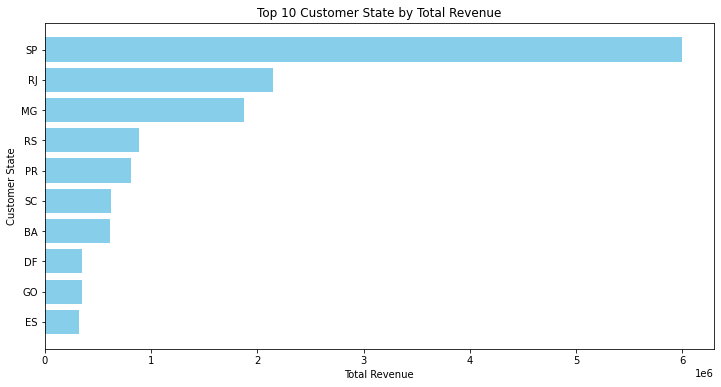

In [ ]:
# Plot the top 10 cities
plt.figure(figsize=(12, 6))
plt.barh(state_revenue['customer_state'].head(10), state_revenue['payment_value'].head(10), color='skyblue')

# Add labels and title
plt.xlabel('Total Revenue')
plt.ylabel('Customer State')
plt.title('Top 10 Customer State by Total Revenue')

# Invert y-axis for better order
plt.gca().invert_yaxis()
plt.show()


##Are there specific times in all regions when customers make the most purchase ?

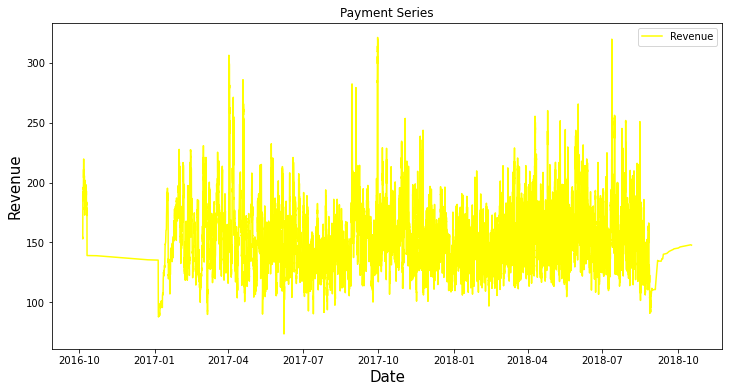

In [219]:
plt.figure(figsize=(12,6))
plt.plot(order_time['order_purchase_timestamp'], order_time['payment_value'].rolling(window=100).mean(), label='Revenue', color = 'yellow')
plt.title('Payment Series')
plt.xlabel('Date', size = 15)
plt.ylabel('Revenue', size=15)
plt.legend()
plt.show()

##What are the most purchased products?

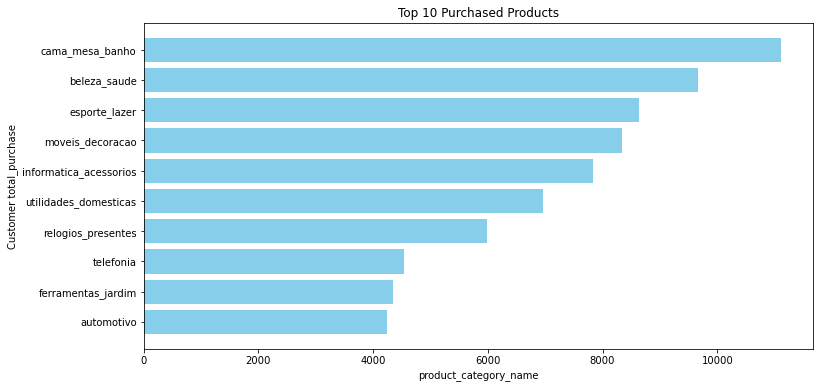

In [235]:
# Plot the top 10 cities
plt.figure(figsize=(12, 6))
plt.barh(most_purchased_product['product_category_name'].head(10), most_purchased_product['total_purchase'].head(10), color='skyblue')

# Add labels and title
plt.xlabel('product_category_name')
plt.ylabel('Customer total_purchase')
plt.title('Top 10 Purchased Products')

# Invert y-axis for better order
plt.gca().invert_yaxis()
plt.show()


##Which seller make the most selling?